In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir=".", untar=True)

In [22]:
data_dir

'./datasets/flower_photos'

In [23]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [24]:
image_count = list(data_dir.glob("*/*.jpg"))
len(image_count)

3670

In [25]:
roses = list(data_dir.glob("roses/*"))
len(roses)

641

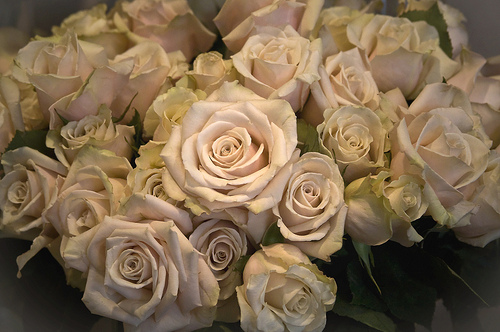

In [26]:
PIL.Image.open(str(roses[5]))

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [29]:
str(flowers_images_dict["roses"][3])

'datasets/flower_photos/roses/6783408274_974796e92f.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict["roses"][3]))

In [31]:
img.shape

(333, 500, 3)

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
x = np.array(x)
y = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [36]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [37]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 81s 924ms/step - loss: 1.3893 - accuracy: 0.4168
Epoch 2/10
86/86 [==============================] - 80s 932ms/step - loss: 1.0618 - accuracy: 0.5868
Epoch 3/10
86/86 [==============================] - 80s 930ms/step - loss: 0.8559 - accuracy: 0.6661
Epoch 4/10
86/86 [==============================] - 80s 927ms/step - loss: 0.6669 - accuracy: 0.7529
Epoch 5/10
86/86 [==============================] - 80s 929ms/step - loss: 0.4522 - accuracy: 0.8347
Epoch 6/10
86/86 [==============================] - 80s 935ms/step - loss: 0.2782 - accuracy: 0.9092
Epoch 7/10
86/86 [==============================] - 81s 941ms/step - loss: 0.1587 - accuracy: 0.9499
Epoch 8/10
86/86 [==============================] - 82s 950ms/step - loss: 0.0974 - accuracy: 0.9691
Epoch 9/10
86/86 [==============================] - 81s 942ms/step - loss: 0.1071 - accuracy: 0.9698
Epoch 10/10
86/86 [==============================] - 82s 953ms/step - loss: 0.0751 - accura

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (32, 180, 180, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (32, 90, 90, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (32, 90, 90, 32)          4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (32, 45, 45, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (32, 45, 45, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (32, 22, 22, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (32, 30976)              

In [39]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 8s 248ms/step - loss: 2.0769 - accuracy: 0.6046


[2.076880931854248, 0.6045751571655273]

In [40]:
predictions = model.predict(x_test_scaled)
predictions


array([[  0.29769653,   1.7270354 ,   8.036188  ,  -3.6496253 ,
          2.6417842 ],
       [  1.2112582 ,   2.0471425 ,   1.9887205 ,  -2.5306542 ,
         -3.2269685 ],
       [  3.3348053 ,   8.143452  ,  15.723585  , -13.796001  ,
         -3.5682442 ],
       ...,
       [ -1.1869271 ,  -3.893535  ,   1.1120316 ,   6.453447  ,
          1.7627317 ],
       [ 11.513539  ,  -5.6318455 , -14.185008  ,   0.64704007,
         10.77104   ],
       [ -1.629204  ,   3.6009119 ,   1.5788819 ,  -0.90991545,
         -4.752967  ]], dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.3278298e-04, 1.8072749e-03, 9.9324036e-01, 8.3554505e-06,
       4.5112250e-03], dtype=float32)>

In [42]:
np.argmax(score)

2

In [43]:
y_test [0]

1

In [44]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



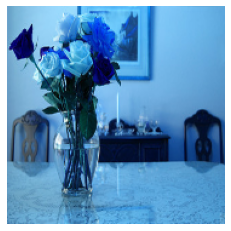

In [45]:
plt.axis('off')
plt.imshow(x[0])

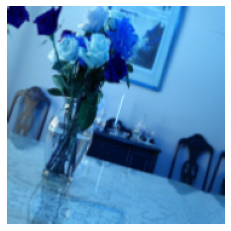

In [46]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [47]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 99s 1s/step - loss: 1.4155 - accuracy: 0.3859
Epoch 2/30
86/86 [==============================] - 98s 1s/step - loss: 1.0998 - accuracy: 0.5483
Epoch 3/30
35/86 [===========>..................] - ETA: 58s - loss: 1.0252 - accuracy: 0.5902

KeyboardInterrupt: ignored

In [46]:
model.evaluate(x_test_scaled,y_test)

